<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Расчёт-эффективности" data-toc-modified-id="Расчёт-эффективности-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Расчёт эффективности</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравним-распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравним-распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределение размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor


In [2]:
df_train=pd.read_csv('D://Игорь/projects/gold_recovery_train_new.csv')
df_test=pd.read_csv('D://Игорь/projects/gold_recovery_test_new.csv')
df_full=pd.read_csv('D://Игорь/projects/gold_recovery_full_new.csv')

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
print('Строк и столбцов в обучающей выборке:', df_train.shape)
print('Количество пропусков в обучающей выборке:', df_train.duplicated().sum())

Строк и столбцов в обучающей выборке: (14149, 87)
Количество пропусков в обучающей выборке: 0


In [6]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
print('Строк и столбцов в тестовой выборке:', df_test.shape)
print('Количество пропусков в тестовой выборке:', df_test.duplicated().sum())

Строк и столбцов в тестовой выборке: (5290, 53)
Количество пропусков в тестовой выборке: 0


In [9]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [11]:
print('Строк и столбцов в исходных данных:', df_full.shape)
print('Количество пропусков в исходных данных:', df_full.duplicated().sum())

Строк и столбцов в исходных данных: (19439, 87)
Количество пропусков в исходных данных: 0


- В обучающей выборке 14 149 строк и 87 стольбцов, в некоторых столбцах имеются пропуски, дубликаты отсутствуют. Все столбцы кроме date формата float64
- В тестовой выборке 5 290 строк и 53 столбца. Имеются пропуски, Все столбцы кроме date формата float64. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

### Расчёт эффективности
Вам нужно смоделировать процесс восстановления золота из золотосодержащей руды.
Эффективность обогащения рассчитывается по формуле

$ Recovery = \frac{C*(F-T)}{F*(C-T)}*100% $

где:
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.
Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

In [12]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [13]:
recovery = ((C*(F-T))/(F*(C-T)))*100
mae = mean_absolute_error(df_train['rougher.output.recovery'], recovery)

In [14]:
print('МАЕ составляет:', mae)

МАЕ составляет: 9.73512347450521e-15


MAE составляет 9,73, является хорошим результатом. эффективность обогащения рассчитана корректно

### Анализ признаков, недоступных в тестовой выборке

In [15]:
#Сравнпваем колонки в обучающей и тестовой выборках
for column in list(df_train.columns):
    if column not in list(df_test.columns):
        print(column)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

- В тестовой выборке отсутствуют выходные параметры продукта 'output': концентрация металлов 'concentrate' и отвальные хвосты 'tail' для металлов (Au, Ag, Pb) и солей (Sol), расчётные признаки на этапе флотации - 'calculation'.
- Данные колонки необходимо удалить из тренировочного датасета,так как появляются во время или после измерения целевых признаков, за исключением столбцов 'final.output.recovery' и 'rougher.output.recovery', т.к. они являются целевыми признаками.

### Предобработка данных

In [16]:
target_train = df_train[['final.output.recovery', 'rougher.output.recovery']]

In [17]:
#удаляем столбцы из обучающей выборки
for column in list(df_train.columns):
    if column not in list(df_test.columns):
        df_train.drop(column, axis=1, inplace=True)

In [18]:
#снова добавим столбцы с целевыми признаками в обучающий датасет
df_train = df_train.join(target_train)

In [19]:
# переводим столбцы с датами в формат datetime
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

In [20]:
#индексируем по дате
df_train= df_train.set_index('date')
df_test= df_test.set_index('date')
df_full = df_full.set_index('date')

In [21]:
#меняем пропуски из датасета на данные из соседних строк
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')
target_train = target_train.fillna(method='ffill')

In [23]:
df_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216,87.107763
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198,86.843261
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445,86.842308
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,68.347543,87.226430
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,66.927016,86.688794


### Вывод:
- В обучающей выборке 14 149 строк и 87 стольбцов, в некоторых столбцах имеются пропуски, дубликаты отсутствуют. Все столбцы кроме date формата float64
- В тестовой выборке 5 290 строк и 53 столбца. Имеются пропуски, Все столбцы кроме date формата float64. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
- MAE составляет 9,73, является хорошим результатом. эффективность обогащения рассчитана корректно
- В тестовой выборке отсутствуют выходные параметры продукта 'output': концентрация металлов 'concentrate' и отвальные хвосты 'tail' для металлов (Au, Ag, Pb) и солей (Sol), расчётные признаки на этапе флотации - 'calculation'.
- Данные колонки необходимо удалить из тренировочного датасета,так как появляются во время или после измерения целевых признаков, за исключением столбцов 'final.output.recovery' и 'rougher.output.recovery', т.к. они являются целевыми признаками.
- столбцы с датами переведены в формат datetime и датасеты проиндексированы по дате
- пропуски из датасета заменены на данные из соседних колоноке


## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [24]:
#Создаем константы с данными по металлам для дальнейшего построения гистограмм по изменению концентрации металлов

#золото
AU = df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au',
              'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
#серебро
AG = df_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
              'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
#свинец
PB = df_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
              'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

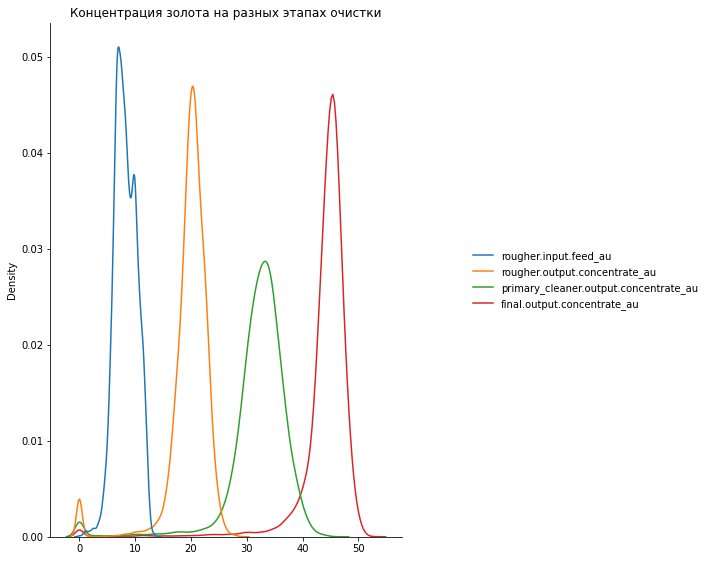

In [25]:
ax = sns.displot(AU, kind='kde', legend=True)
#plt.legend(labels = ['Исходное сырье', 'После флотации', 'Первичная обработка', 'Финальный концентрат'])
plt.title('Концентрация золота на разных этапах очистки')
ax.fig.set_figwidth(10)
ax.fig.set_figheight(8)
plt.show()

Концентрация золота после очистки уменьшилась


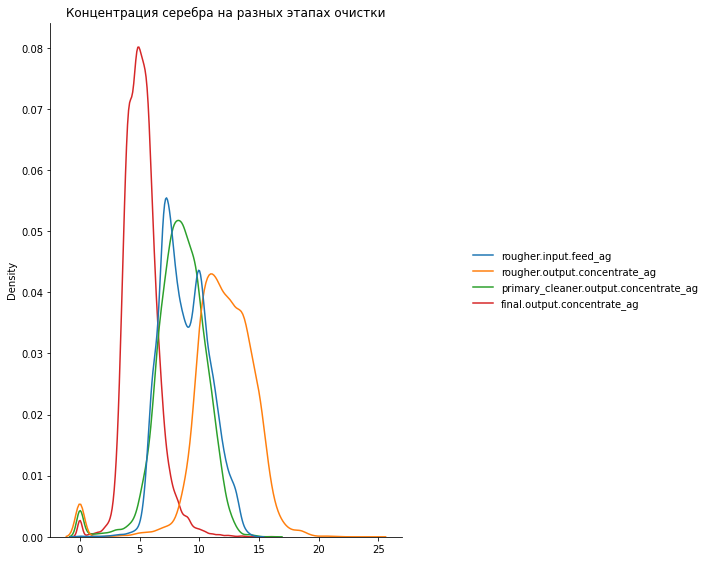

In [26]:
ax = sns.displot(AG, kind='kde', legend=True)
#plt.legend(labels = ['Исходное сырье', 'После флотации', 'Первичная обработка', 'Финальный концентрат'])
plt.title('Концентрация серебра на разных этапах очистки')
ax.fig.set_figwidth(10)
ax.fig.set_figheight(8)
plt.show()

Концентрация серебра после очистки увеличилась

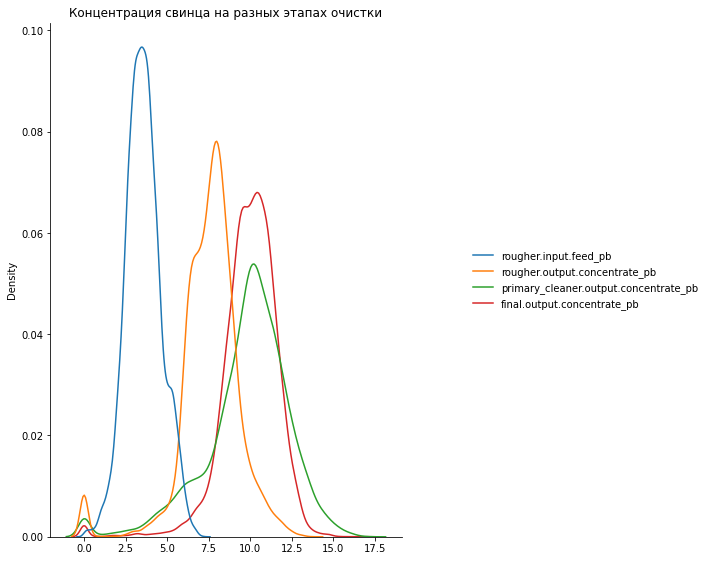

In [27]:
ax = sns.displot(PB, kind='kde', legend=True)
#plt.legend(labels = ['Исходное сырье', 'После флотации', 'Первичная обработка', 'Финальный концентрат'])
plt.title('Концентрация свинца на разных этапах очистки')
ax.fig.set_figwidth(10)
ax.fig.set_figheight(8)
plt.show()

Концентрация свинца после очистки уменьшилась

###  Сравним распределение размеров гранул сырья на обучающей и тестовой выборках.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


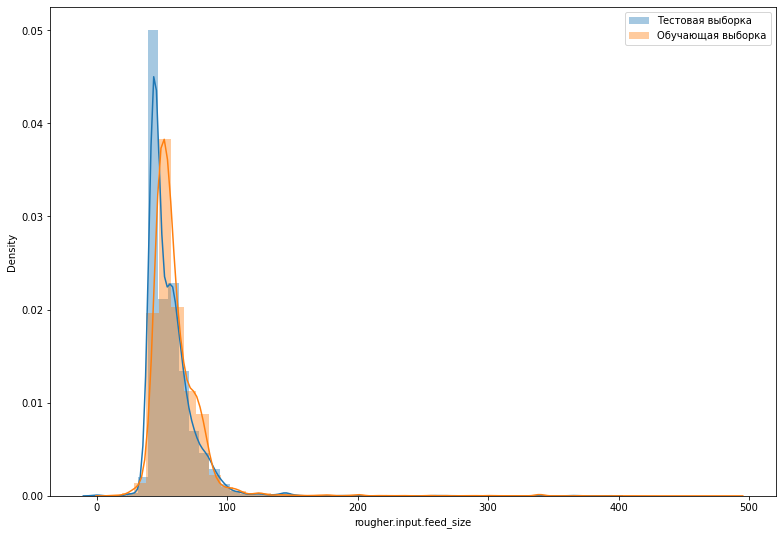

In [28]:
plt.figure(figsize=(13,9))
sns.distplot(df_test['rougher.input.feed_size'], label='Тестовая выборка')
sns.distplot(df_train['rougher.input.feed_size'], label='Обучающая выборка')
plt.legend()
plt.show()

Распределение сырья на обучающей и тестовой выборпках не сильно отличаются, модель должна работать правильно

### Исследуем суммарную концентрацию всех веществ на разных стадиях

In [29]:
#rougher input 
sum_feed = (df_full['rougher.input.feed_ag'] +
            df_full['rougher.input.feed_pb'] +
            df_full['rougher.input.feed_sol'] +
            df_full['rougher.input.feed_au'])

In [30]:
#rougher output 
sum_rougher = (df_full['rougher.output.concentrate_ag'] + 
               df_full['rougher.output.concentrate_pb'] + 
               df_full['rougher.output.concentrate_sol'] + 
               df_full['rougher.output.concentrate_au'])

In [31]:
#primary cleaner
sum_primary = (df_full['primary_cleaner.output.concentrate_ag'] + 
               df_full['primary_cleaner.output.concentrate_pb'] + 
               df_full['primary_cleaner.output.concentrate_sol'] + 
               df_full['primary_cleaner.output.concentrate_au'])

In [32]:
#final output
sum_final = (df_full['final.output.concentrate_ag'] + 
             df_full['final.output.concentrate_pb'] + 
             df_full['final.output.concentrate_sol'] + 
             df_full['final.output.concentrate_au'])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

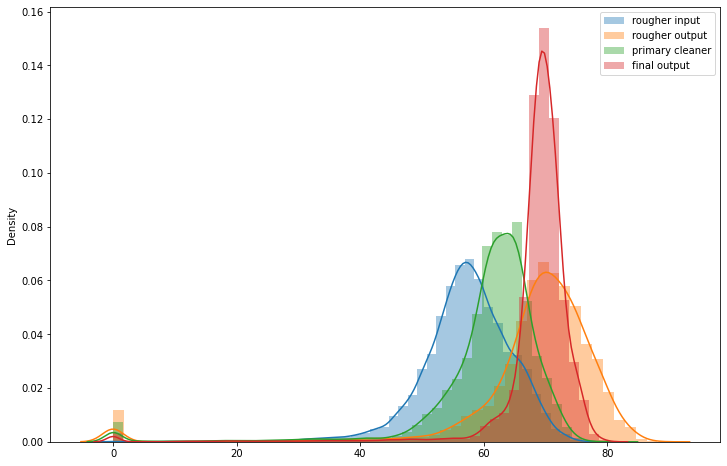

In [33]:
plt.figure(figsize=(12,8))
sns.distplot(sum_feed, label='rougher input')
sns.distplot(sum_rougher, label='rougher output')
sns.distplot(sum_primary, label='primary cleaner')
sns.distplot(sum_final, label='final output')
plt.legend()
plt.show()

По гистограмме видно что на первых трех этапах концентрация практически не меняется, а на финальном этапе увеличивается почти в 2 раза

In [34]:
train_feed = (df_train['rougher.input.feed_ag'] +
             df_train['rougher.input.feed_pb'] +
             df_train['rougher.input.feed_sol'] +
             df_train['rougher.input.feed_au'])

<Figure size 864x576 with 0 Axes>

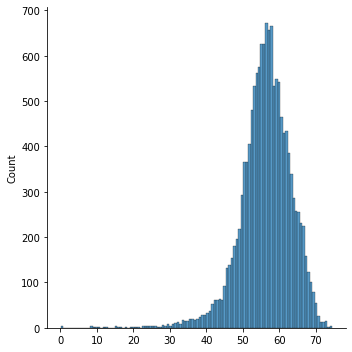

In [35]:
plt.figure(figsize=(12,8))
sns.displot(train_feed)
plt.show()

In [36]:
df_full.shape

(19439, 86)

In [37]:
# убираем нулевые значения
df_train = df_train[(df_train['rougher.input.feed_ag']>1)
                    &(df_train['rougher.input.feed_pb']>1)
                    &(df_train['rougher.input.feed_sol']>1)
                    &(df_train['rougher.input.feed_au']>1)]

In [38]:
df_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216,87.107763
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198,86.843261
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445,86.842308
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,68.347543,87.226430
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,66.927016,86.688794


In [39]:
test_feed = (df_test['rougher.input.feed_ag'] +
             df_test['rougher.input.feed_pb'] +
             df_test['rougher.input.feed_sol'] +
             df_test['rougher.input.feed_au'])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


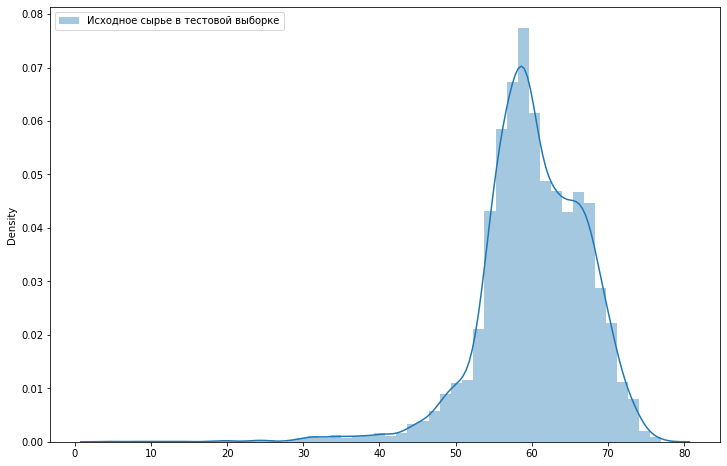

In [40]:
plt.figure(figsize=(12,8))
sns.distplot(test_feed, label='Исходное сырье в тестовой выборке')
plt.legend()
plt.show()

### Вывод:
1. Концентрация золота и свинца после очистки уменьшается, при этом концентррация серебра после очистки увеличивается
2. Распределение сырья на обучающей и тестовой выборпках не сильно отличаются, модель должна работать правильно
3. На первых трех этапах концентрация практически не меняется, а на финальном этапе увеличивается почти в 2 раза

## Модель

### Напишем функцию для вычисления итоговой sMAPE

In [41]:
def smape (target, predictions):
    return 1/len(target)*sum(abs(target-predictions)/((abs(target)+abs(predictions))/2))*100

In [42]:
#создаем новую метрику для оценки качества модели
smape_score = make_scorer(smape)

In [43]:
def total_smape (smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

In [44]:
#создадим выборки с признаками и целевыми признаками
# общие признаки для двух целевых признаков
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1)
# целевой признак для финальной концентрации
target_final_train = df_train['final.output.recovery']
# целевой признак для флотации
target_rougher_train = df_train['rougher.output.recovery']

### Дерево решений

In [45]:
def tree(features, target):
    best_tree = None
    best_depth = 0
    best_smape = 20
    for depth in range(1, 10):
        model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
        #model.fit(features, target)
        smape_score_tree = cross_val_score(model, features, target, cv=5, scoring=smape_score, n_jobs=-1).mean()
        if smape_score_tree < best_smape:
            best_tree = model
            best_smape = smape_score_tree
            best_depth = depth
    print('Лучший результат sMAPE: {} с глубиной дерева {}'.format(best_smape, best_depth))
    return best_tree, best_smape

In [46]:
#для этапа флотации
tree_rougher, tree_rougher_smape = tree(features_train, target_rougher_train)

Лучший результат sMAPE: 11.531455970056712 с глубиной дерева 4


In [47]:
#на финальном этапе
tree_final, tree_final_smape = tree(features_train, target_final_train)

Лучший результат sMAPE: 10.312148747789308 с глубиной дерева 2


In [48]:
#итоговое sMAPE дерева решений
tree_total_smape = total_smape(tree_rougher_smape, tree_final_smape)
print('Итоговое sMAPE для дерева решений:', tree_total_smape)

Итоговое sMAPE для дерева решений: 10.61697555335616


### Случайный лес

In [49]:
def forest(features, target):
    best_forest = None
    best_est = 0
    best_depth = 0
    best_smape = 20
    for depth in range(1, 10):
        for est in range(1,10):
            model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
            model.fit(features, target)
            smape_score_forest = cross_val_score(model, features, target, cv=5, scoring=smape_score, n_jobs=-1).mean()
            if smape_score_forest < best_smape:
                best_forest = model
                best_smape = smape_score_forest
                best_depth = depth
                best_est = est
    print('Лучший результат sMAPE: {} с max_depth {} и n_estimators {}'
      .format(best_smape, best_depth, best_est))
    return (best_forest, best_smape)

In [50]:
#для этапа флотации
forest_rougher, forest_rougher_smape = forest(features_train, target_rougher_train)

Лучший результат sMAPE: 10.901806523121152 с max_depth 5 и n_estimators 6


In [51]:
#на финальном этапе
forest_final, forest_final_smape = forest(features_train, target_final_train)

Лучший результат sMAPE: 10.021508844838745 с max_depth 5 и n_estimators 7


In [52]:
#итоговое sMAPE по случайному лесу
forest_total_smape = total_smape(forest_rougher_smape, forest_final_smape)
print('Итоговое sMAPE для случайного леса:',forest_total_smape)

Итоговое sMAPE для случайного леса: 10.241583264409346


### Линейная регрессия

In [53]:
def reg_model(features, target):
    regression_model = LinearRegression()
    regression_model.fit(features, target)
    smape_score_regression = cross_val_score(regression_model, features, target, cv=5, scoring=smape_score, n_jobs=-1).mean()
    print('Лучший результат sMAPE:', smape_score_regression)
    return (regression_model, smape_score_regression)

In [54]:
#для этапа флотации
regression_rougher, regression_rougher_smape = reg_model(features_train, target_rougher_train)

Лучший результат sMAPE: 12.774081397480435


In [55]:
#на финальном этапе
regression_final, regression_final_smape = reg_model(features_train, target_final_train)

Лучший результат sMAPE: 11.971313778991847


In [56]:
#итоговое sMAPE по линейной регрессии
regression_total_smape = total_smape(regression_rougher_smape, regression_final_smape)
print('Итоговое sMAPE для линейной регрессии:', regression_total_smape)

Итоговое sMAPE для линейной регрессии: 12.172005683613994


Лучший результат sMAE у Случайного Леса с результатом 10,32

### Проверка модели на тестовой выборке

In [57]:
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [58]:
#для начала подготовим тестовую выборку
# общие признаки для двух целевых признаков
features_test = df_test

#целевые признаки возьмем из датасета full, т.к. в тестовой выборке их нет
# целевой признак для этапа флотации
target_rougher_test = df_full['rougher.output.recovery'][df_test.index]
# целевой признак для финальной концентрации
target_final_test = df_full['final.output.recovery'][df_test.index]

In [59]:
target_rougher_test.shape

(5290,)

In [60]:
target_final_test.shape

(5290,)

In [61]:
forest_model_rougher = RandomForestRegressor(random_state=12345, n_estimators=6, max_depth=5)
forest_model_rougher.fit(features_train, target_rougher_train)
forest_model_rougher_prediction = forest_model_rougher.predict(features_test)
#smape_forest_model_rougher = cross_val_score(forest_model_rougher, features_test, target_rougher_test, cv=5, scoring=smape_score).mean()
#
smape_forest_model_rougher = smape(target_rougher_test, forest_model_rougher_prediction)
print('sMAPE случайного леса на тестовой выборке:', smape_forest_model_rougher)

sMAPE случайного леса на тестовой выборке: 10.367271089922271


In [62]:
forest_model_final = RandomForestRegressor(random_state=12345, n_estimators=7, max_depth=5)
forest_model_final.fit(features_train, target_final_train)
#smape_forest_model_final = cross_val_score(forest_model_final, features_test, target_final_test, cv=5, scoring=smape_score).mean()

forest_model_final_prediction = forest_model_final.predict(features_test)
smape_forest_model_final = smape(target_final_test, forest_model_final_prediction)
print('sMAPE случайного леса на тестовой выборке:', smape_forest_model_final)

sMAPE случайного леса на тестовой выборке: 9.849680670080513


In [63]:
forest_total_test_smape = total_smape(smape_forest_model_rougher, smape_forest_model_final)
print('Итоговое sMAPE случайного леса на тестовой выборке:', forest_total_test_smape)

Итоговое sMAPE случайного леса на тестовой выборке: 9.979078275040953


Итоговое sMAPE случайного леса на тестовой выборке: 9.979078275040953

In [69]:
#DummyRegressor
dummy_rougher = DummyRegressor(strategy='mean')
dummy_rougher.fit(features_train, target_rougher_train)
dummy_rougher_predict = dummy_rougher.predict(features_test)

dummy_final = DummyRegressor(strategy='mean')
dummy_final.fit(features_train, target_final_train)
dummy_final_predict = dummy_rougher.predict(features_test)

In [70]:
#sMAPE
smape_dummy_rougher_test = smape(target_rougher_test, dummy_rougher_predict)
smape_dummy_final_test = smape(target_final_test, dummy_final_predict)
dummy_total_test_smape = total_smape(smape_dummy_rougher_test, smape_dummy_final_test)
print('Итоговый sMAPE DummyRegressor:', dummy_total_test_smape)

Итоговый sMAPE DummyRegressor: 17.854900797328266


In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

### Вывод:
- Было получсено 3 модели: дерево решений, случайный лес, линейная регрессия
- Результаты sMAPE по моделям:
1. Дерево решений - 10.99
2. Случайный лес - 9.84
3. Линейная регрессия - 12.38
- Итоговое sMAPE случайного леса на тестовой выборке: 9.979078275040953
- Итоговый sMAPE DummyRegressor: 17.854900797328266, наша модель работает адекватно

## Вывод:
- В обучающей выборке 14 149 строк и 87 стольбцов, в некоторых столбцах имеются пропуски, дубликаты отсутствуют. Все столбцы кроме date формата float64
- В тестовой выборке 5 290 строк и 53 столбца. Имеются пропуски, Все столбцы кроме date формата float64. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
- MAE составляет 9,73, является хорошим результатом. эффективность обогащения рассчитана корректно
- В тестовой выборке отсутствуют выходные параметры продукта 'output': концентрация металлов 'concentrate' и отвальные хвосты 'tail' для металлов (Au, Ag, Pb) и солей (Sol), расчётные признаки на этапе флотации - 'calculation'.
- Данные колонки необходимо удалить из тренировочного датасета,так как появляются во время или после измерения целевых признаков, за исключением столбцов 'final.output.recovery' и 'rougher.output.recovery', т.к. они являются целевыми признаками.
- столбцы с датами переведены в формат datetime и датасеты проиндексированы по дате
- пропуски из датасета заменены на данные из соседних колоноке

- Концентрация золота и свинца после очистки уменьшается, при этом концентррация серебра после очистки увеличивается
- Распределение сырья на обучающей и тестовой выборпках не сильно отличаются, модель должна работать правильно
- На первых трех этапах концентрация практически не меняется, а на финальном этапе увеличивается почти в 2 раза

- Было получсено 3 модели: дерево решений, случайный лес, линейная регрессия
- Результаты sMAPE по моделям:
1. Дерево решений - 10.99
2. Случайный лес - 9.84
3. Линейная регрессия - 12.38
- Итоговое sMAPE случайного леса на тестовой выборке: 9.979078275040953
- Итоговый sMAPE DummyRegressor: 17.854900797328266, наша модель работает адекватно